### 統計學習與深度學習
### Homework 2


請將IPYNB檔上傳至COOL作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。


### 第一題 [Data Preprocessing]

(10%) 資料前處理是一個重要的工作，本題將利用UCI的"Adult" dataset <https://archive.ics.uci.edu/ml/datasets/Adult>來練習資料前處理。我們使用這個資料集的方式是用來建構預測最後一個收入欄位是'>50K'或'<=50K'。這個資料集已經先切好了Training跟Test。我們將會沿用這個切割。

資料前處理包含以下工作:
* 生成以下numpy變數: x_train(訓練特徵)、y_train(訓練標籤)、x_test(測試特徵)、y_test(測試標籤)。用一個Dictionary組織將這些變數，其中Key為變數名稱，Value為之前生成的變數內容。
* 最後一欄為標籤，將'>50K'與'<=50K'轉成1跟0。其他欄位為特徵。
* 把所有含有缺值的Rows刪除。
* 所有數值欄位標準化(均數為0，變異數為1)。測試資料特徵需用訓練資料的均數與變異數標準化。
* 所有類別欄位(如native-country與workclass)都應使用"1-of-K"轉換成0與1的欄位。
* 我們只考慮在訓練資料中出現超過(含)10次的特徵值。如果一個特徵值出現不到10次，則刪除這個特徵值所對應的1-of-K欄位。
* 你可以使用sklearn中的工具函數進行1-of-K encoding與變數標準化。


#### Q1作法：讀取資料後利用numpy轉換成dummy variable，再用sklearn進行標準化，最後存成字典作比較

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
# 讀取adult.test
with open('C:\\Users\\HP\\Downloads\\adult.data') as f:
    train = f.read().splitlines()

# 將資料以逗號分割並且清除缺值
train_cleared = []
for i in range(len(train)):
    if "?" not in train[i]:
        train_cleared.append(train[i].replace(" ", "").split(","))

# 讀取adult.data
with open('C:\\Users\\HP\\Downloads\\adult.test') as f:
    test = f.read().splitlines()

# 將資料以逗號分割並且清除缺值
test_cleared = []
for i in range(len(test)):
    if "?" not in test[i]:
        test_cleared.append(test[i].replace(" ", "").split(","))

In [3]:
# 用 panda讀取
col_name = ["age", "workclass", "fnlwgt", "education", "educational-num", "marital-status", "occupation", "relationship", 
            "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country", "tag"]
df_train = pd.DataFrame(train_cleared, columns=col_name)
df_test = pd.DataFrame(test_cleared, columns=col_name)

# df_train = df_train.drop([0, ])  # 首列及末列為空白
df_train = df_train.drop([len(df_train)-1])  # 末列為空白
df_test = df_test.drop([0])  # 首列為空白
df_test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,tag
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15056,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
15057,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
15058,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
15059,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
# 撿查資料格式
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  object
 1   workclass        30162 non-null  object
 2   fnlwgt           30162 non-null  object
 3   education        30162 non-null  object
 4   educational-num  30162 non-null  object
 5   marital-status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   gender           30162 non-null  object
 10  capital-gain     30162 non-null  object
 11  capital-loss     30162 non-null  object
 12  hours-per-week   30162 non-null  object
 13  native-country   30162 non-null  object
 14  tag              30162 non-null  object
dtypes: object(15)
memory usage: 2.0+ MB


In [5]:
# 重新調整data type
num_col = ['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num', 'age', 'fnlwgt']

for col in num_col:
    print(col)
    df_train[col] = df_train[col].astype(float)
    df_test[col] = df_test[col].astype(int)

# 檢視目前 datatype
df_train.info()

capital-loss
hours-per-week
capital-gain
educational-num
age
fnlwgt
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              30162 non-null  float64
 1   workclass        30162 non-null  object 
 2   fnlwgt           30162 non-null  float64
 3   education        30162 non-null  object 
 4   educational-num  30162 non-null  float64
 5   marital-status   30162 non-null  object 
 6   occupation       30162 non-null  object 
 7   relationship     30162 non-null  object 
 8   race             30162 non-null  object 
 9   gender           30162 non-null  object 
 10  capital-gain     30162 non-null  float64
 11  capital-loss     30162 non-null  float64
 12  hours-per-week   30162 non-null  float64
 13  native-country   30162 non-null  object 
 14  tag              30162 non-null  object 
dtypes: float64(6), object(9)
memory usag

In [6]:
# 利用 pandas 將 categorical轉換成dummy 的樣子
temp = pd.get_dummies(df_train)
train_dum = pd.DataFrame(temp)

temp = pd.get_dummies(df_test)
test_dum = pd.DataFrame(temp)
test_dum

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,tag_<=50K.,tag_>50K.
1,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15056,33,245211,13,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
15057,39,215419,13,0,0,36,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
15058,38,374983,13,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
15059,44,83891,13,5455,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [7]:
# 用 sklearn 來對數字欄位標準化
from sklearn.preprocessing import StandardScaler
train_scaler = StandardScaler().fit(train_dum[num_col])
# train_scaler.mean_
# train_scaler.scale_

# 將 numeric 標準化 
train_dum[num_col] = StandardScaler().fit_transform(train_dum[num_col])
# train_dum

# test 要用 train.scaler 來標準化
test_dum[num_col] = train_scaler.transform(test_dum[num_col])

In [8]:
# 如果一個特徵值出現不到10次，則刪除這個特徵值所對應的1-of-K欄位(train data)
for col in train_dum.columns:
    if train_dum[col].sum(axis = 0) <= 10 and col not in num_col:
        print("移除的欄位：", col)
        train_dum = train_dum.drop(columns=[col])

移除的欄位： occupation_Armed-Forces
移除的欄位： native-country_Holand-Netherlands


In [9]:
# 參考題目說明讀取pickle
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [10]:
# 把我們清理好的資料變成dict
adult_dict = dict()
adult_dict["y_train"] = np.array(train_dum["tag_>50K"])
adult_dict["y_test"] = np.array(test_dum["tag_>50K."])

In [11]:
# 按照pickle檔的順序作排列
train_dum = train_dum.reindex(list(adult50kp['columnname']), axis=1)
test_dum = test_dum.reindex(list(adult50kp['columnname']), axis=1)
test_dum

,capital-loss,hours-per-week,capital-gain,educational-num,age,fnlwgt,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,...,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
1,-0.218586,-0.077734,-0.147445,-1.224066,-1.023104,0.350286,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.218586,0.757005,-0.147445,-0.439738,-0.033340,-0.946320,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.218586,-0.077734,-0.147445,0.736754,-0.794697,1.392858,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.218586,-0.077734,0.890601,-0.047574,0.423474,-0.278945,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,-0.218586,-0.912474,-0.147445,-1.616231,-0.337883,0.084232,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15056,-0.218586,-0.077734,-0.147445,1.128918,-0.414018,0.524529,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15057,-0.218586,-0.411630,-0.147445,1.128918,0.042796,0.242545,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
15058,-0.218586,0.757005,-0.147445,1.128918,-0.033340,1.752835,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15059,-0.218586,-0.077734,0.589098,1.128918,0.423474,-1.002382,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [12]:
adult_dict["x_train"] = np.array(train_dum.iloc[:])
adult_dict["x_test"] = np.array(test_dum.iloc[:])

In [13]:
# 比較與給定的檔案是否相同
# match
elems = ['x_train', 'x_test', 'y_train', 'y_test']
# elems = ['x_train', 'y_train']
for aelem in elems:
    # print(np.sum(adult_dict[aelem]))
    # print(np.sum(adult50kp[aelem]))
    cnomatch = np.sum(adult_dict[aelem] != adult50kp[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train match!
x_test match!
y_train match!
y_test match!


### 第二題 [ROC and AUC]
(35%) Receiver operation characteristic (ROC)曲線以及其線下面積 (Area Under Curve; AUC)為衡量分類器預測能力常用的工具。本題將練習繪製ROC以及計算AUC。
在這之前我們必須載入資料，訓練模型，並進行預測:

In [14]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
# train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])

# make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])

# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)    

Accuracy = 0.848340


#### 回答下面問題:

* Q2.1 (17.5%): 基於`adult50kp['y_test']`與`ypredprob`繪製ROC Curve。
* Q2.2 (17.5%): 計算繪製出的ROC Curve的AUC。

規定與提示:
* 禁用現成的ROC與AUC計算函數，如 `sklearn.metrics.roc_curve`與`sklearn.metrics.auc`。違者本題零分。
* 計算AUC時可以利用相鄰的FP_Rate與其對應的TP_Rate所形成的梯形近似該小塊面積，然後加總所有梯形的面積即可得到AUC。梯形面積計算請參考下圖。

#### Q2.1 設定不同的threshold後計算FP_Rate跟TP_Rate並存起來，之後用散布圖畫出來

In [15]:
# 確認一下樣子
ypredprob

array([[0.9971064 , 0.0028936 ],
       [0.87754669, 0.12245331],
       [0.61870641, 0.38129359],
       ...,
       [0.30266451, 0.69733549],
       [0.71862998, 0.28137002],
       [0.20393013, 0.79606987]])

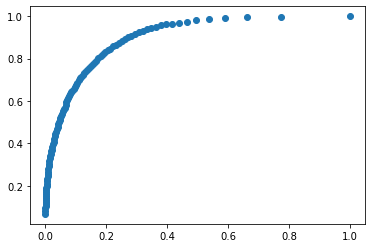

In [16]:
yact = adult50kp['y_test']

# false positive rate
fpr = []
# true positive rate
tpr = []
# Iterate thresholds from 0.01, 0.02, ... ,0.99, 1.0
thresholds = np.arange(0.0, 1, .01)

# get number of positive and negative examples in the dataset
P = sum(yact)
N = len(yact) - P

# iterate through all thresholds and determine fraction of true positives
# and false positives found at this threshold
for thresh in thresholds:
    FP=0
    TP=0
    for i in range(len(ypredprob)):
        if ypredprob[i][1] > thresh:  # calculae TP and FP rate according to threshold
            if yact[i] == 1:
                TP = TP + 1
            elif yact[i] == 0:
                FP = FP + 1
    # save to fpr and tpr list to plot
    fpr.append(FP/float(N))
    tpr.append(TP/float(P))
# plot
plt.scatter(fpr, tpr)
plt.show()

#### Q2.2 根據剛剛存起來的FP_Rate跟TP_Rate，利用numpy提供的梯形公式函數計算AUC

In [17]:
print("fpr:", len(fpr))
print("tpr:", len(tpr))

# 因為是從大到小，反轉方便計算AUC
fpr.reverse()
tpr.reverse()

fpr: 100
tpr: 100


In [18]:
# Calculate AUC
# numpy 有提供梯形公式
auc = np.trapz(tpr, fpr)
print('AUC:', auc)

AUC: 0.9033084078797107


### 第三題 [Logistic Regression with L2 Regularization]

(55%) The Logistic regression with L2 regularization minimize the following error function:

$\frac{\lambda}{2} w^T w - \sum_{i=1}^n [ t_i \ln y_i  + (1 - t_i) \ln (1 - y_i)],$

where $y_i = \frac{1}{1 + exp({-w^T x_i})}$ and $t_i \in \{0, 1\}$ is the label value, $x_i$ is the feature vector, and $w$ is the regression coefficient vector. 

(中間省略)

In this model, each regression coefficient may be associated with a different regularization coefficient. Bearing with the risk of ambigulity, we (again) use the scalar $\lambda_k$ to denote the regularization coefficient for $w_k$.  The vector $w = [w_1, w_2, ..., w_D]^T$ is the  regression coefficient vector. Let $\Lambda$ denote the diagonal matrix that have $\lambda_k$ at $\Lambda_{kk}$. Our new error function becomes: 

$E(w) = \frac{1}{2} w^T \Lambda w - \sum_{i=1}^n [ t_i \ln y_i  + (1 - t_i) \ln (1 - y_i)],$

where $y_i = \frac{1}{1 + exp({-w^T x_i})}$. 

Answer the following questions:

* Q3.1 (15%) Derive the gradient and hessian matrix for the new E(w). 
* Q3.2 (25%) Create your mylogistic_l2 class. Train your model and show the learned $w$ as well as test accuracy for the cases below. If $w$ is too long for you, show selected $w$ for continuous-valued, binary-valued, and the constant term.  
    * Case 1: lambda = 1 for all coefficients
    * Case 2: lambda = 1 for all but the intercept, no regularization for intercept term.
    * Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.
* Q3.3 (10%) Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters. Set the regularization coefficient for the constant term to zero. Allow different regularizations for continuous-valued and binary-valued features. Let $a_1$ and $a_2$ denote the regularization coefficients for continuous-valued and binary-valued features. Search the best $a_1$ and $a_2$ and report the test accuracy using the best hyper-parameters. You should follow the following procedure to search for the best hyperparameters. 
    1. Choose a set of grids among a reasonable range. For example, 10 grids in [0.01, 100]. 
    2. Conduct grid search with the constraint that $a_1 = a_2$. Record the best value $a_1^*$ and $a_2^*$.
    3. Fix $a_1 = a_1^*$, and search $a_2$ for the best value, call the result the new $a_2^*$. 
    4. Fix $a_2 = a_2^*$, and search $a_1$ for the best value.
    5. Report the selected $a_1$ and $a_2$.
    6. Train a model using the selected hyper-parameters, and report the test accuracy. 
  
* Q3.4 (5%) Use sklearn.linear_model.LogisticRegression to train and test the model (including hyperparameter tuning). Compare the estimated parameters and test accuracy with those from your own models. 

#### Q3.1 

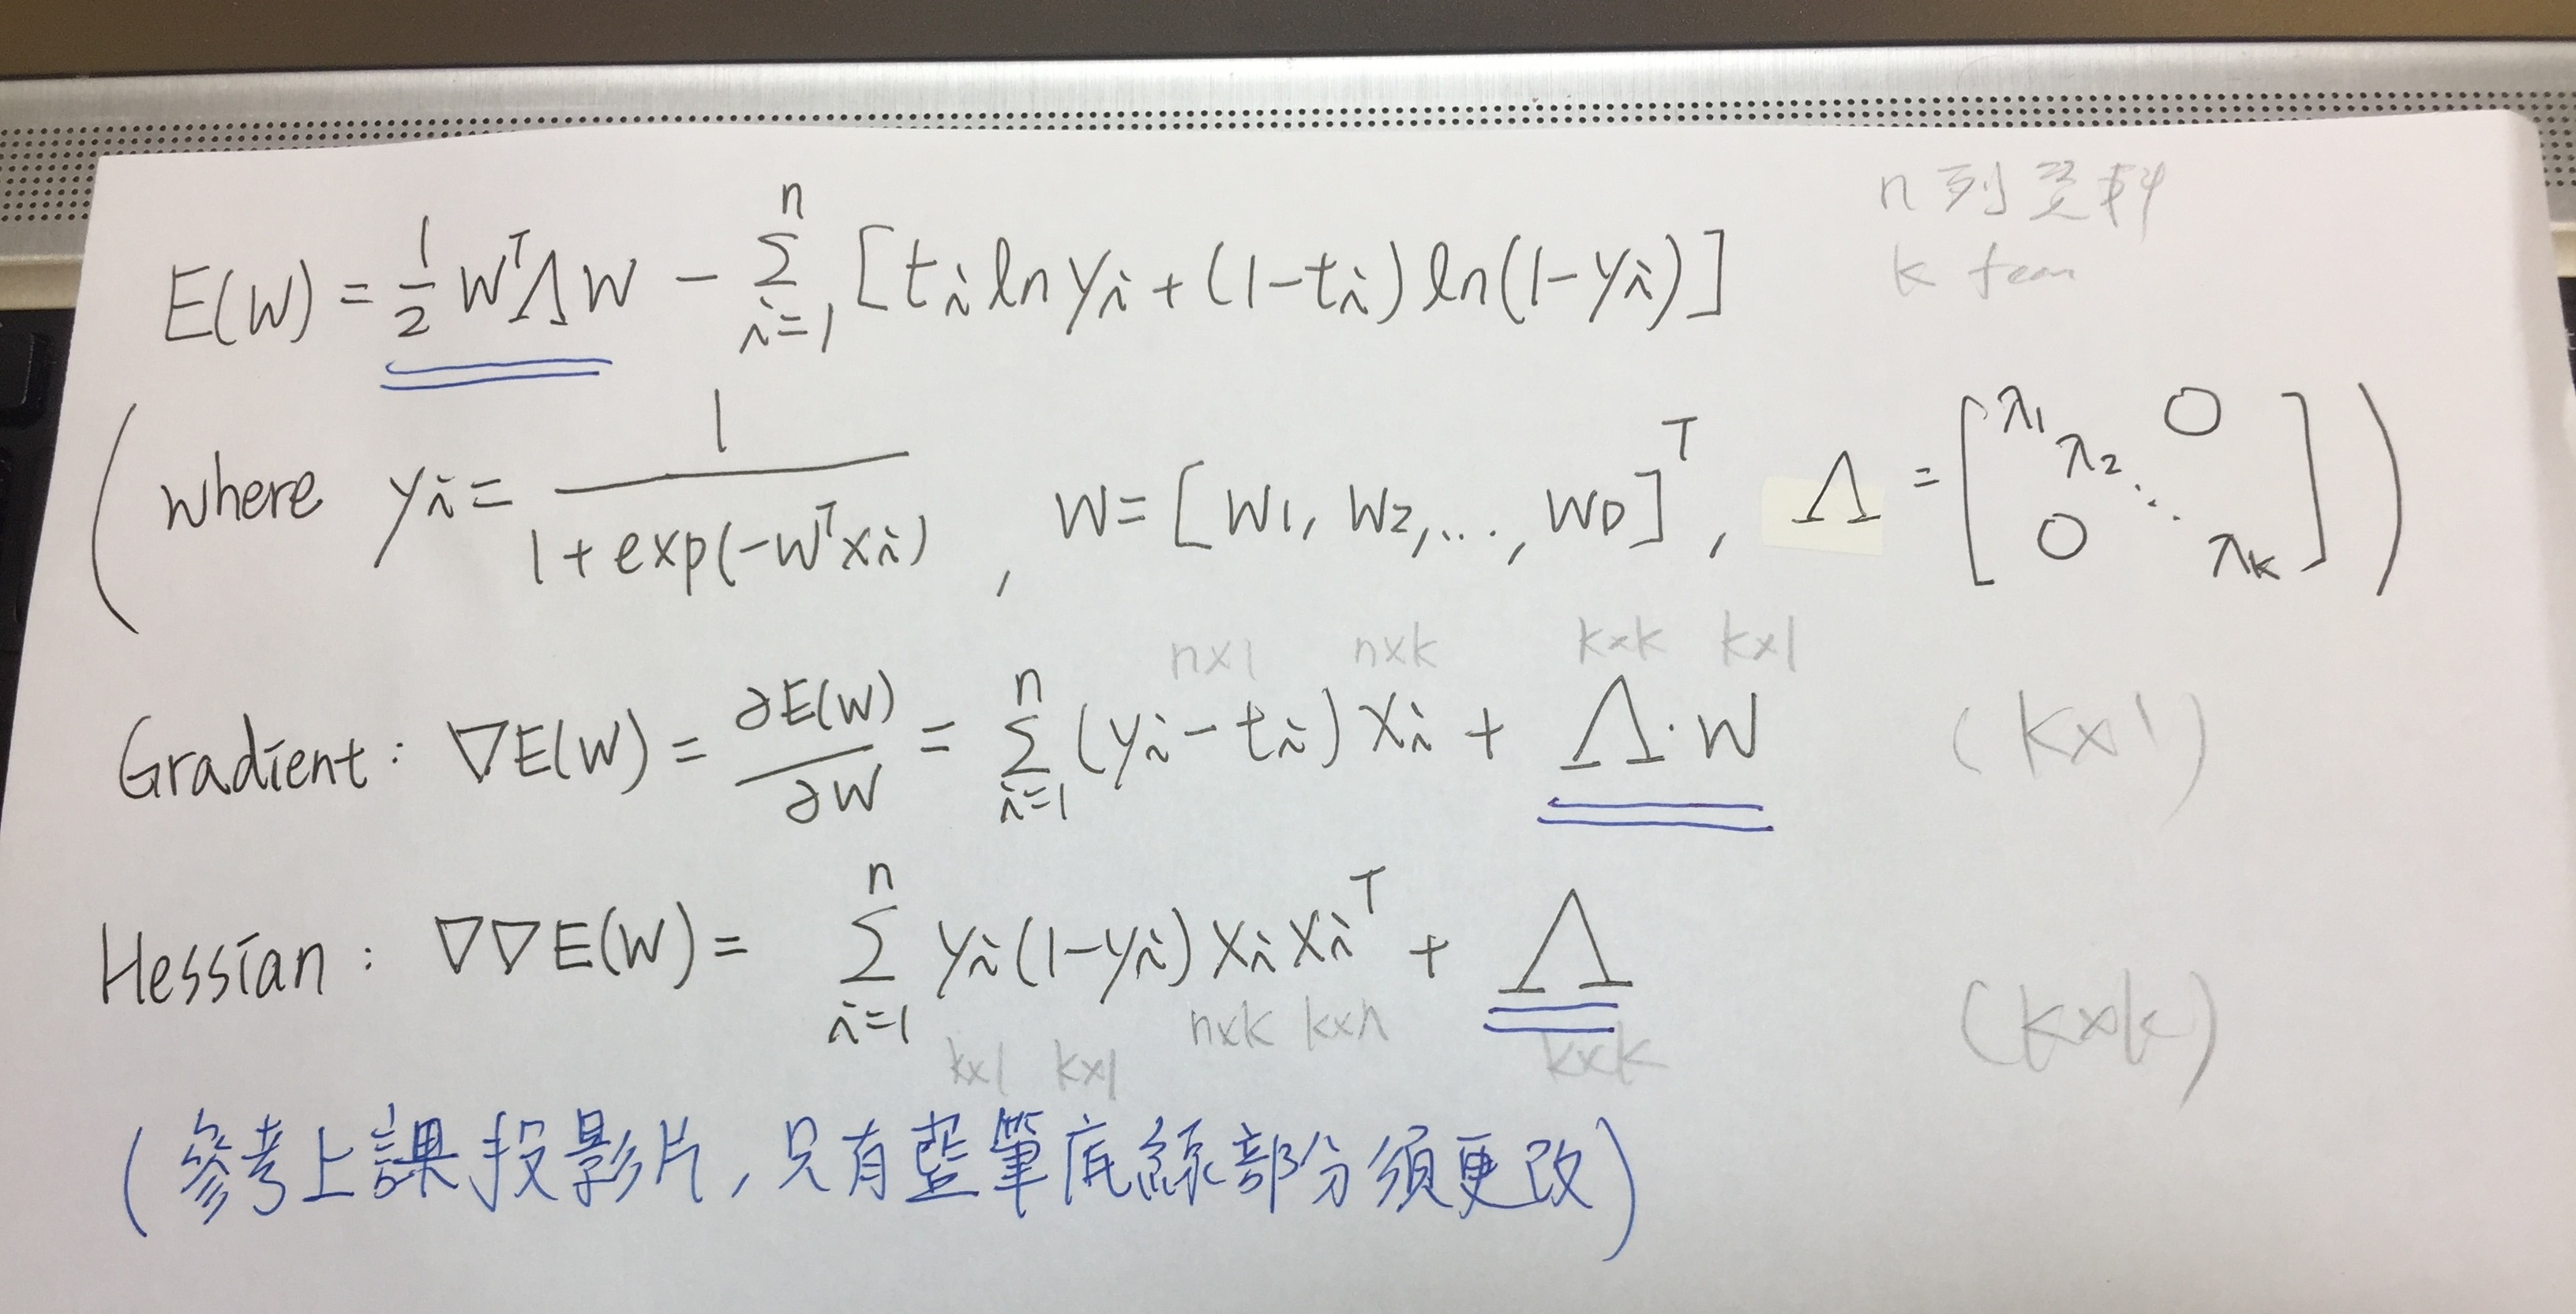

In [19]:
from IPython.display import Image
Image(filename="HW2_prove.jpg",width=600,height=600)
# gradient = ∑(yi - ti)xi + Λw
# R = np.diagflat(y * (1 - y))

#### Q3.2 先寫出mylogistic_l2 class，再根據不同case依序執行要求，並且印出accuracy

In [20]:
from sklearn import metrics, linear_model
from sklearn.model_selection import GridSearchCV, train_test_split

In [21]:
x_train = adult50kp["x_train"]
y_train = adult50kp["y_train"]
x_test = adult50kp["x_test"]
y_test = adult50kp["y_test"]

In [22]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 100, tol = 1e-5, add_intercept = True):
        """reg_vec: the regularization coefficient vector
           max_iter: maximum number of iteration to run for the Newton method
           tol: tolerance for the objective function
           add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix"""
        ### Add your code here
        self.reg_vec = reg_vec
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept

    def __sigmoid(self, z):  # sigmoid function
        return 1 / (1 + np.exp(-z))

    def fit(self, x, y, verbal = False):
        #Add your code here
        if self.add_intercept:  # constant = 1
            self.x_train = np.c_[x, np.ones(x.shape[0])]
            self.y_train = y
        else:
            self.x_train = x
            self.y_train = y
        
        # initial w vector given by ridge regression
        w = np.linalg.inv(self.x_train.T.dot(self.x_train) +
                                (np.diag(self.reg_vec).mean()
                                    * np.identity(self.x_train.shape[1]))) \
                .dot(self.x_train.T) \
                .dot(self.y_train)
        # print("w", w)
        # print("w.shape:", w.shape)

        # IRLS Loop to find optimal w
        error = []
        best_w = None
        for i in range(self.max_iter):
            y = self.__sigmoid(np.dot(self.x_train, w)) # y = n(data size) * 1, each element is in [0,1]
            t = self.y_train  # t = n(data size) * 1
            # print(y.shape, t.shape)
            
            # gradient = ∑(yi - ti)xi + Λw 
            gradient = self.reg_vec.dot(w) + self.x_train.T.dot(y - t)  # gradient = m(feature size) * 1
            
            # Hession = x^T * R * x + Λ, where R is NxN diagonal matrix with the diagonal is yn * ( 1-yn )
            # R = np.diagflat(y * (1 - y))
            # hession = self.x_train.T.dot(R).dot(self.x_train) + self.reg_vec
            ds= y*(1-y)
            # print(type(ds))
            # D = np.diag(ds.ravel()) 
            # H =  X_train.T.dot(D.dot(X_train) )+np.identity(self.reg_vec.shape[0])*self.reg_vec
            hession_half = self.x_train.T.copy()
            for j in range(hession_half.shape[0]):  # row
                for k in range(hession_half.shape[1]):
                    hession_half[j][k] = hession_half[j][k]*ds[k]
            
            hession = hession_half.dot(self.x_train) + self.reg_vec
            # print(hession.shape)
            
            # new_w = old_w - gradient/hession
            w = w - np.linalg.inv(hession).dot(gradient)
            # print("w", w)
            new_error = 0.5 * w.T.dot(self.reg_vec).dot(w) - (t * np.log(y) + (1 - t * np.log((1 - y)))).sum()
            
            if i > 0 and new_error < error[-1]:
                best_w = w
            if i > 0 and abs(new_error - error[-1]) <= self.tol:
                break
            else:
                error.append(new_error)

            # w is determined after the IRLS converged
            self.w = best_w
        self.error_list = error

    def predict(self, x):
        """doing prediction"""
        ### add your code here.
        if self.add_intercept:
            self.x_test = np.c_[x, np.ones(x.shape[0])]
        else:
            self.x_test = x
        pred = self.__sigmoid(np.dot(self.x_test, self.w))
        return pred.round()

In [23]:
# case_1: lambda = 1 for all coefficients
lambda_vec_1 = np.diagflat([1] * (x_train.shape[1] + 1))
logic1 = mylogistic_l2(reg_vec = lambda_vec_1, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(x_train, y_train)
ypred1 = logic1.predict(x_test)
print('accuracy is', metrics.accuracy_score(y_test, ypred1))
#print('coefficients w are', logic1.w)

accuracy is 0.847875166002656


In [24]:
#case_2: lambda = 1 for all but the intercept, no regularization for intercept term.
lambda_vec_2 = np.diagflat([1] * x_train.shape[1] + [0])
logic2 = mylogistic_l2(reg_vec = lambda_vec_2, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic2.fit(x_train, y_train)
ypred2 = logic2.predict(x_test)
print('accuracy is', metrics.accuracy_score(y_test, ypred2))

accuracy is 0.8477423638778221


In [25]:
#case_3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for incercept
lambda_vec_3 = np.diagflat([1] * 6 + [0.5] *(x_train.shape[1]-6) + [0])
logic3 = mylogistic_l2(reg_vec = lambda_vec_3, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic3.fit(x_train, y_train)
ypred3 = logic3.predict(x_test)
metrics.accuracy_score(y_test, ypred3)
print('accuracy is', metrics.accuracy_score(y_test, ypred3))

accuracy is 0.847675962815405


#### Q3.2心得：在lambda = 1 for all coefficients的狀況下，accuracy會最高

#### Q3.3 

In [26]:
def lambda_vec(a1, a2):
    return np.diagflat([a1] * 6 + [a2] * 96 + [0])

x_subtrain, x_tuning, y_subtrain, y_tuning = train_test_split(x_train,y_train, train_size=0.9)
lambda_list = np.logspace(-2,2,10)

In [27]:
# stage_1
stage_1 = []
for i in lambda_list:
    q3_3_logic = mylogistic_l2(max_iter = 1000, tol = 1e-5, add_intercept = True, reg_vec=lambda_vec(i,i))
    q3_3_logic.fit(x_subtrain, y_subtrain)
    ypred = q3_3_logic.predict(x_tuning)
    stage_1.append(metrics.accuracy_score(y_tuning, ypred))

print('a1, a2 are', lambda_list[stage_1.index(max(stage_1))])

a1, a2 are 1.6681005372000592


In [28]:
# stage 2: fixed a1
stage_2 = []
for i in lambda_list:
    q2_4_logic = mylogistic_l2(max_iter = 1000, tol = 1e-5, add_intercept = True, reg_vec=lambda_vec(lambda_list[stage_1.index(max(stage_1))],i))
    q2_4_logic.fit(x_subtrain, y_subtrain)
    ypred = q2_4_logic.predict(x_tuning)
    stage_2.append(metrics.accuracy_score(y_tuning, ypred))
print('new a2 is', lambda_list[stage_2.index(max(stage_2))])

new a2 is 1.6681005372000592


In [29]:
# stage 3: fixed a2
stage_3 = []
for i in lambda_list:
    q2_4_logic = mylogistic_l2(max_iter = 1000, tol = 1e-5, add_intercept = True, reg_vec=lambda_vec(i,lambda_list[stage_2.index(max(stage_2))]))
    q2_4_logic.fit(x_subtrain, y_subtrain)
    ypred = q2_4_logic.predict(x_tuning)
    stage_3.append(metrics.accuracy_score(y_tuning, ypred))
print('new a1 is', lambda_list[stage_3.index(max(stage_3))])

new a1 is 100.0


In [30]:
print('The best pair of (a1, a2) is (',lambda_list[stage_3.index(max(stage_3))],',',lambda_list[stage_2.index(max(stage_2))],')')

The best pair of (a1, a2) is ( 100.0 , 1.6681005372000592 )


In [31]:
# Final summary
q2_4_logic_final = mylogistic_l2(max_iter = 1000, tol = 1e-5, add_intercept = True, reg_vec=lambda_vec(lambda_list[stage_3.index(max(stage_3))],lambda_list[stage_2.index(max(stage_2))]))
q2_4_logic_final.fit(x_train, y_train)
q2_5_logic_final_pred = q2_4_logic_final.predict(x_test)
print('The best pair of (a1, a2) is (',lambda_list[stage_3.index(max(stage_3))],',',lambda_list[stage_2.index(max(stage_2))],')')
print('The resulting accuracy is', metrics.accuracy_score(y_test, q2_5_logic_final_pred))

The best pair of (a1, a2) is ( 100.0 , 1.6681005372000592 )
The resulting accuracy is 0.847211155378486


#### Q3.3心得：不知道為什麼a1, a2這麼高，但是準確率還不錯

#### Q3.4 用套件作！

In [32]:
# Q_2.5: Compare with standard logistics regression in sklearn library
grid={"C":np.logspace(-2,2,10),"penalty":["l2"]}
q2_5_logic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
logreg_cv=GridSearchCV(q2_5_logic,grid)
logreg_cv.fit(x_subtrain,y_subtrain)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
q2_5_logic_final = linear_model.LogisticRegression(C=logreg_cv.best_params_['C'], penalty='l2')
q2_5_logic_final.fit(x_train, y_train)

tuned hpyerparameters :(best parameters)  {'C': 0.5994842503189409, 'penalty': 'l2'}
accuracy : 0.8482225087493094


c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5994842503189409)

#### Q3.4心得：用套件快很多，而且準確率比自己在那邊跑很久還高一點點，但是如果把iter再設高一點說不定就可以跟套件一樣了